In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd

In [ ]:
CLIENT_ID = 'fea517ed3160484ab33f2b534c8d4fd2'
CLIENT_SECRET = '215335e07e8f4ea0b75885a163ef2697'
REDIRECT_URI = 'http://127.0.0.1:8888/callback'
SCOPE = 'user-library-read user-read-recently-played'

In [3]:
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    redirect_uri=REDIRECT_URI,
    scope=SCOPE
))

In [29]:
# Obtaining my liked songs

tracks = []
limit = 50
offset = 0

while True:
    results = sp.current_user_saved_tracks(limit = limit, offset = offset)
    items = results['items']

    if not items:
        break

    for item in items:
        track = item['track']
        album = track['album']
        artist_id = track['artists'][0]['id']
        artist_info = sp.artist(artist_id)
        genres = artist_info['genres']

        # If there is no gender for an artist, fill it with Unknown
        if not genres:
            genres = 'Unknown'
            
        tracks.append({
            'id': track['id'],
            'name': track['name'],
            'artist': track['artists'][0]['name'],
            'album': track['album']['name'],
            'genres': genres,
            'popularity': track['popularity'],
            'duration': track['duration_ms'],
            'explicit': track['explicit'],
            'added_at': item['added_at'],
            'released': album['release_date'],

        })

    offset += limit


df_likes = pd.DataFrame(tracks)
df_likes.head()

,id,name,artist,album,genres,popularity,duration,explicit,added_at,released
0,3lfjd8A0DkB84yrvjzkbry,Hora Loca,Rawayana,¿Quién trae las cornetas?,"[spanish-language reggae, reggae]",66,191825,False,2025-09-20T20:25:38Z,2023-09-21
1,5unjCay0kUjuej5ebn4nS4,Down In Atlanta,Pharrell Williams,Down In Atlanta,Unknown,60,164041,True,2025-09-20T20:22:56Z,2022-11-18
2,07DOGcAf5wXvgT2dCfbutE,Mala Mía,Mori,Mala Mía,Unknown,40,255581,False,2025-09-20T20:03:24Z,2024-04-25
3,4ab39A1ehnZyegM1D9ca3C,RIDE,AntoneNow,GREY MATTER,Unknown,48,165107,False,2025-09-20T20:02:24Z,2024-10-04
4,2n1MTLCis6qPSDKdr5XSDI,Oh Qué Será?,Willie Colón,Greatest Hits,"[salsa, merengue, son cubano]",72,304200,False,2025-09-20T19:40:33Z,2008-02-26


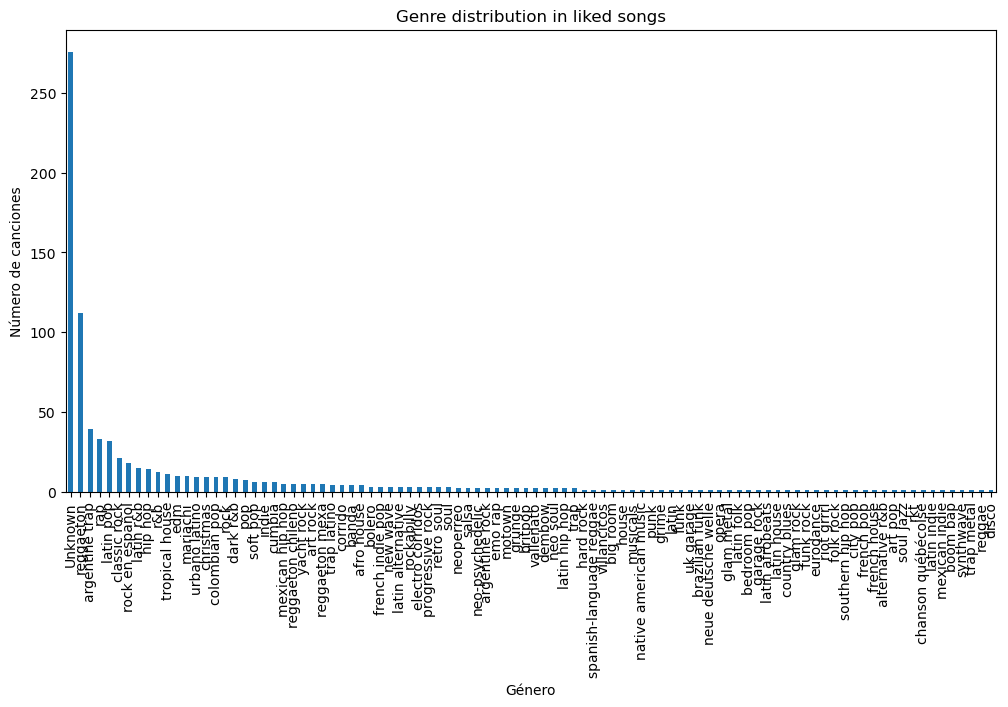

In [31]:
# Cleaning genres for more general classification

import matplotlib.pyplot as plt

# Obtaining main gender of each song for easier cleaning
df_likes['main_genre'] = df_likes['genres'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else "Unknown")

# Ocurrencies by gender z
genre_count = df_likes['main_genre'].value_counts()

#Histogram
plt.figure(figsize=(12,6))
genre_count.plot(kind='bar')
plt.title('Genre distribution in liked songs')
plt.xlabel('Género')
plt.ylabel('Número de canciones')
plt.xticks(rotation=90)
plt.show()

In [32]:
for genre, count in genre_count.items():
    print(f"{genre}: {count}")

Unknown: 276
reggaeton: 112
argentine trap: 39
rap: 33
latin pop: 32
classic rock: 21
rock en español: 18
latin r&b: 15
hip hop: 14
r&b: 12
tropical house: 11
edm: 10
mariachi: 10
urbano latino: 9
christmas: 9
colombian pop: 9
rock: 9
dark r&b: 8
pop: 7
soft pop: 6
indie: 6
cumbia: 6
mexican hip hop: 5
reggaeton chileno: 5
yacht rock: 5
art rock: 5
reggaeton mexa: 5
trap latino: 4
corrido: 4
banda: 4
afro house: 4
bolero: 3
french indie pop: 3
new wave: 3
latin alternative: 3
rockabilly: 3
electro corridos: 3
progressive rock: 3
retro soul: 3
soul: 3
neoperreo: 2
salsa: 2
neo-psychedelic: 2
argentine rock: 2
emo rap: 2
motown: 2
grunge: 2
britpop: 2
vallenato: 2
dembow: 2
neo soul: 2
latin hip hop: 2
trap: 2
hard rock: 1
spanish-language reggae: 1
villancicos: 1
big room: 1
house: 1
musicals: 1
native american music: 1
punk: 1
grime: 1
latin: 1
funk: 1
uk garage: 1
brazilian funk: 1
neue deutsche welle: 1
opera: 1
glam metal: 1
latin folk: 1
bedroom pop: 1
garage rock: 1
latin afrobeat

In [33]:
# Cleaning Unknown genre
unknown_genres = df_likes[df_likes['main_genre'] == "Unknown"]

print(unknown_genres['artist'].unique())

['Pharrell Williams' 'Mori' 'AntoneNow' 'Twenty One Pilots' 'W Sound'
 'The Weeknd' 'Don Toliver' 'Daniel Caesar' 'Empire Of The Sun' 'nulled.'
 'Jacob Banks' 'The Heavy' 'Cordae' 'Tyler, The Creator' 'Kali Uchis'
 'Sade' 'Dominic Fike' 'Bruno Mars' 'Loverboy' 'Finger Eleven' 'YUNGBLUD'
 'mgk' 'Metro Boomin' 'Nelly Furtado' 'Imagine Dragons' 'Lenny Kravitz'
 'B. Nasty' 'Paperboy Fabe' 'Mishaal Tamer'
 'James Brown & The Famous Flames' "K'NAAN" 'Planet Giza' 'WizTheMc'
 'C. Tangana' 'Hotel Ugly' 'Leon Thomas' 'Mac Miller' 'Steve Lacy'
 'Ismatricule' 'BODHI' 'Michael Jackson' 'Quevedo' 'Keaton Simons'
 'Artemas' 'Tory Lanez' '6LACK' 'Leonel García' 'Deyco' 'Alvaro Diaz'
 'Sevdaliza' 'WWE' 'Natasha Bedingfield' 'Kid Cudi' 'James Blake'
 'Frank Ocean' 'Jack Harlow' 'Childish Gambino' 'Brady' 'Free Nationals'
 'Foster The People' 'SAG' 'The Change' 'Carlos Corté$'
 'The Neighbourhood' 'The Technicolors' 'Pretty Boy Aaron' 'ODIE'
 'Aaron May' 'ame' 'Motaki' 'STRANGEHUMAN' 'RÜFÜS DU SOL' 'Ada

In [34]:
# Mapping genres for these artists

artist_genre_map = {
    "Pharrell Williams": "R&B",
    "Mori": "Latin",
    "AntoneNow": "Hip Hop",
    "Twenty One Pilots": "Alternative/Indie",
    "W Sound": "Electronic",
    "The Weeknd": "R&B",
    "Don Toliver": "Hip Hop",
    "Daniel Caesar": "R&B",
    "Empire Of The Sun": "Electronic",
    "nulled.": "Other",
    "Jacob Banks": "Soul",
    "The Heavy": "Rock",
    "Cordae": "Hip Hop",
    "Tyler, The Creator": "Hip Hop",
    "Kali Uchis": "R&B",
    "Sade": "R&B",
    "Dominic Fike": "Alternative/Indie",
    "Bruno Mars": "Pop",
    "Loverboy": "Rock",
    "Finger Eleven": "Rock",
    "YUNGBLUD": "Alternative/Indie",
    "mgk": "Hip Hop",
    "Metro Boomin": "Hip Hop",
    "Nelly Furtado": "Pop",
    "Imagine Dragons": "Alternative/Indie",
    "Lenny Kravitz": "Rock",
    "B. Nasty": "Hip Hop",
    "Paperboy Fabe": "Hip Hop",
    "Mishaal Tamer": "Pop",
    "James Brown & The Famous Flames": "Soul",
    "K'NAAN": "Hip Hop",
    "Planet Giza": "Hip Hop",
    "WizTheMc": "Hip Hop",
    "C. Tangana": "Latin",
    "Hotel Ugly": "Pop",
    "Leon Thomas": "Jazz",
    "Mac Miller": "Hip Hop",
    "Steve Lacy": "R&B",
    "Ismatricule": "Other",
    "BODHI": "Electronic",
    "Michael Jackson": "Pop",
    "Quevedo": "Latin",
    "Keaton Simons": "Pop",
    "Artemas": "Pop",
    "Tory Lanez": "R&B",
    "6LACK": "R&B",
    "Leonel García": "Latin",
    "Deyco": "Latin",
    "Alvaro Diaz": "Latin",
    "Sevdaliza": "Alternative/Indie",
    "WWE": "Other",
    "Natasha Bedingfield": "Pop",
    "Kid Cudi": "Hip Hop",
    "James Blake": "Electronic",
    "Frank Ocean": "R&B",
    "Jack Harlow": "Hip Hop",
    "Childish Gambino": "R&B",
    "Brady": "Other",
    "Free Nationals": "R&B",
    "Foster The People": "Alternative/Indie",
    "SAG": "Other",
    "The Change": "Rock",
    "Carlos Corté$": "Hip Hop",
    "The Neighbourhood": "Alternative/Indie",
    "The Technicolors": "Rock",
    "Pretty Boy Aaron": "Hip Hop",
    "ODIE": "R&B",
    "Aaron May": "Pop",
    "ame": "Electronic",
    "Motaki": "Pop",
    "STRANGEHUMAN": "Pop",
    "RÜFÜS DU SOL": "Electronic",
    "Adam Jensen": "Other",
    "DJ Fronteo": "Electronic",
    "Lao Ra": "Latin",
    "Zayde Wølf": "Rock",
    "Gesaffelstein": "Electronic",
    "Paulo": "Latin",
    "Sonic Piñotas Music": "Latin",
    "Billie Eilish": "Pop",
    "Kodi Lee": "Pop",
    "El Burger": "Latin",
    "Feloman": "Hip Hop",
    "The Score": "Alternative/Indie",
    "Feder": "Electronic",
    "Mau Moctezuma": "Latin",
    "Micro TDH": "Latin",
    "MAX": "Pop",
    "5 Seconds of Summer": "Pop",
    "Michl": "Pop",
    "blackbear": "R&B",
    "Alina Baraz": "R&B",
    "B.J. Thomas": "Pop",
    "Alan Walker": "Electronic",
    "Post Malone": "Hip Hop",
    "Swae Lee": "Hip Hop",
    "Justin Bieber": "Pop",
    "The Hollies": "Rock",
    "Khalid": "R&B",
    "Jack Stauber": "Alternative/Indie",
    "Black Coast": "Electronic",
    "Janice": "Pop",
    "Black Eyed Peas": "Hip Hop",
    "Sia": "Pop",
    "Tones And I": "Pop",
    "Freya Ridings": "Pop",
    "Chava Salazar": "Latin",
    "Alan M.": "Other",
    "Jay Oc": "Hip Hop",
    "Lucifer": "Rock",
    "Javier Rojas Henríquez": "Latin",
    "Solmate": "R&B",
    "Mr Cashier": "Hip Hop",
    "Khenry": "Hip Hop",
    "French Montana": "Hip Hop",
    "Lil Nas X": "Hip Hop",
    "Gerard Way": "Rock",
    "Woodkid": "Alternative/Indie",
    "Frankie Valli": "Pop",
    "Oh The Larceny": "Rock",
    "Jonas Brothers": "Pop",
    "Aaron Smith": "Pop",
    "LMFAO": "Electronic",
    "Survivor": "Rock",
    "Lauv": "Pop",
    "Whethan": "Electronic",
    "SAINt JHN": "Hip Hop",
    "Aminé": "Hip Hop",
    "Whitney Houston": "Pop",
    "LP": "Pop",
    "Blackway": "Hip Hop",
    "The Police": "Rock",
    "Gnarls Barkley": "R&B",
    "KURT": "Rock",
    "DJ Snake": "Electronic",
    "Dvicio": "Pop",
    "Angeles": "Latin",
    "Matisse": "Latin",
    "Huey Lewis & The News": "Rock",
    "benny blanco": "Pop",
    "Dynoro": "Electronic",
    "Clean Bandit": "Electronic",
    "Capital Cities": "Pop",
    "Cardi B": "Hip Hop"
}

# Replacing lines with Unknown genre
df_likes.loc[df_likes['main_genre'] == "Unknown", 'main_genre'] = \
    df_likes.loc[df_likes['main_genre'] == "Unknown", 'artist'].map(artist_genre_map)

In [35]:
# Making sure we have no more Unknown genres
unknown_count = df_likes[df_likes['main_genre'] == "Unknown"].shape[0]

print(f"Songs with Unknown genre: {unknown_count}")

Songs with Unknown genre: 0


In [36]:
# Grouping specific genres into more generals (made in this way to give priority)

def genre_mapping(s):
    s_lower = s.lower()
    if "reggaeton" in s_lower:
        return "Reggaeton"
    elif "trap" in s_lower:
        return "Trap"
    elif "hip hop" in s_lower or "rap" in s_lower:
        return "Hip Hop"
    elif "r&b" in s_lower:
        return "R&B"
    elif "latin" in s_lower or "cumbia" in s_lower or "mariachi" in s_lower:
        return "Latin"
    elif "pop" in s_lower:
        return "Pop"
    elif "rock" in s_lower:
        return "Rock"
    elif "alternative" in s_lower or "indie" in s_lower:
        return "Alternative/Indie"
    elif "electronic" in s_lower or "edm" in s_lower or "house" in s_lower:
        return "Electronic"
    elif "soul" in s_lower:
        return "Soul"
    else:
        return "Other"

df_likes['main_genre'] = df_likes['main_genre'].apply(genre_mapping)

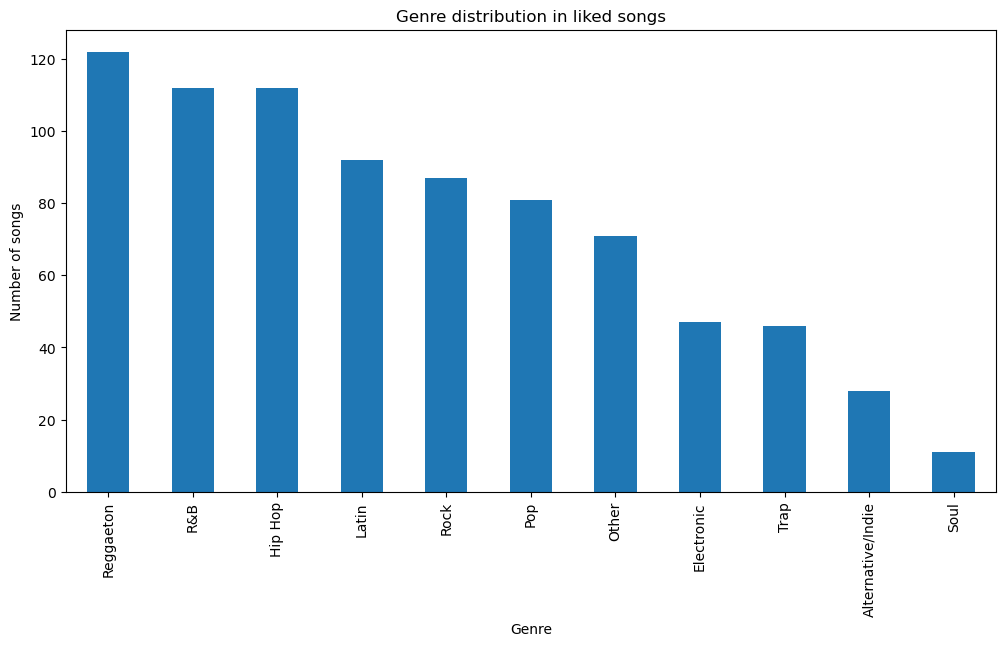

In [37]:
# Final genre distribution

genre_count = df_likes['main_genre'].value_counts()

#Histogram
plt.figure(figsize=(12,6))
genre_count.plot(kind='bar')
plt.title('Genre distribution in liked songs')
plt.xlabel('Genre')
plt.ylabel('Number of songs')
plt.xticks(rotation=90)
plt.show()

In [39]:
df_likes.head()

,id,name,artist,album,genres,popularity,duration,explicit,added_at,released,main_genre
0,3lfjd8A0DkB84yrvjzkbry,Hora Loca,Rawayana,¿Quién trae las cornetas?,"[spanish-language reggae, reggae]",66,191825,False,2025-09-20T20:25:38Z,2023-09-21,Other
1,5unjCay0kUjuej5ebn4nS4,Down In Atlanta,Pharrell Williams,Down In Atlanta,Unknown,60,164041,True,2025-09-20T20:22:56Z,2022-11-18,R&B
2,07DOGcAf5wXvgT2dCfbutE,Mala Mía,Mori,Mala Mía,Unknown,40,255581,False,2025-09-20T20:03:24Z,2024-04-25,Latin
3,4ab39A1ehnZyegM1D9ca3C,RIDE,AntoneNow,GREY MATTER,Unknown,48,165107,False,2025-09-20T20:02:24Z,2024-10-04,Hip Hop
4,2n1MTLCis6qPSDKdr5XSDI,Oh Qué Será?,Willie Colón,Greatest Hits,"[salsa, merengue, son cubano]",72,304200,False,2025-09-20T19:40:33Z,2008-02-26,Other
